In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier



In [4]:
train_df = pd.read_csv('preprocessed/train.csv')
val_df = pd.read_csv('preprocessed/val.csv')
test_df = pd.read_csv('preprocessed/test.csv')

In [5]:
# Vectorize text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['review'])
y_train = train_df['sentiment']
X_val = vectorizer.transform(val_df['review'])
y_val = val_df['sentiment']
X_test = vectorizer.transform(test_df['review'])
y_test = test_df['sentiment']

In [6]:
# Train different models
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Linear SVM': LinearSVC(),
    'Random Forest': RandomForestClassifier()
}

In [7]:
for name, model in models.items():
    print(f'Training {name}...')
    model.fit(X_train, y_train)

    # Evaluate model on validation set
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f'Validation accuracy of {name}: {acc:.4f}')
    print(classification_report(y_val, y_pred))


Training Multinomial Naive Bayes...
Validation accuracy of Multinomial Naive Bayes: 0.8629
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3705
           1       0.87      0.86      0.86      3733

    accuracy                           0.86      7438
   macro avg       0.86      0.86      0.86      7438
weighted avg       0.86      0.86      0.86      7438

Training Logistic Regression...
Validation accuracy of Logistic Regression: 0.8935
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      3705
           1       0.88      0.91      0.90      3733

    accuracy                           0.89      7438
   macro avg       0.89      0.89      0.89      7438
weighted avg       0.89      0.89      0.89      7438

Training Linear SVM...
Validation accuracy of Linear SVM: 0.8962
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      370

In [11]:
# Test best model on test set
best_model = LinearSVC()  # Choose the best model based on validation results
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test accuracy of {best_model}: {acc:.4f}')
print(classification_report(y_test, y_pred))

Test accuracy of LinearSVC(): 0.8912
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3705
           1       0.88      0.90      0.89      3732

    accuracy                           0.89      7437
   macro avg       0.89      0.89      0.89      7437
weighted avg       0.89      0.89      0.89      7437



In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Perform grid search with cross-validation
clf = GridSearchCV(
    LinearSVC(max_iter=10000),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
clf.fit(X_train, y_train)

# Print the best hyperparameters found
print(f'Best hyperparameters: {clf.best_params_}')

# Evaluate the best model on the validation set
best_model = clf.best_estimator_
y_pred = best_model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f'Validation accuracy of best model: {acc:.4f}')
print(classification_report(y_val, y_pred))

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test accuracy of best model: {acc:.4f}')
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\swt4fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\swt4fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\swt4fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
                                           ^^^^^^^^^^^^^^^
  Fil

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Validation accuracy of best model: 0.8933
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3705
           1       0.88      0.91      0.90      3733

    accuracy                           0.89      7438
   macro avg       0.89      0.89      0.89      7438
weighted avg       0.89      0.89      0.89      7438

Test accuracy of best model: 0.8915
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3705
           1       0.88      0.91      0.89      3732

    accuracy                           0.89      7437
   macro avg       0.89      0.89      0.89      7437
weighted avg       0.89      0.89      0.89      7437



In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SimpleRNN, Dropout, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [23]:
# Tokenize text data and pad sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['review'])
X_train = tokenizer.texts_to_sequences(train_df['review'])
X_train = pad_sequences(X_train, maxlen=500, padding='post', truncating='post')
y_train = train_df['sentiment']
X_val = tokenizer.texts_to_sequences(val_df['review'])
X_val = pad_sequences(X_val, maxlen=500, padding='post', truncating='post')
y_val = val_df['sentiment']
X_test = tokenizer.texts_to_sequences(test_df['review'])
X_test = pad_sequences(X_test, maxlen=500, padding='post', truncating='post')
y_test = test_df['sentiment']

Epoch 1/10
272/272 [==============================] - 9s 30ms/step - loss: 0.4487 - accuracy: 0.7731 - val_loss: 0.2813 - val_accuracy: 0.8850
Epoch 2/10
272/272 [==============================] - 9s 31ms/step - loss: 0.2117 - accuracy: 0.9192 - val_loss: 0.2754 - val_accuracy: 0.8889
Epoch 3/10
272/272 [==============================] - 8s 30ms/step - loss: 0.1101 - accuracy: 0.9657 - val_loss: 0.3083 - val_accuracy: 0.8860
Epoch 4/10
272/272 [==============================] - 7s 28ms/step - loss: 0.0331 - accuracy: 0.9932 - val_loss: 0.3929 - val_accuracy: 0.8756
Epoch 5/10
272/272 [==============================] - 8s 29ms/step - loss: 0.0075 - accuracy: 0.9992 - val_loss: 0.4601 - val_accuracy: 0.8762
Epoch 6/10
272/272 [==============================] - 7s 26ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.5078 - val_accuracy: 0.8760
Epoch 7/10
272/272 [==============================] - 8s 30ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5343 - val_accuracy: 0.8755

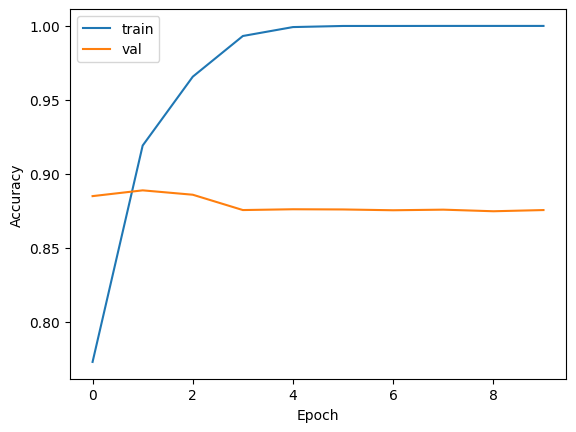

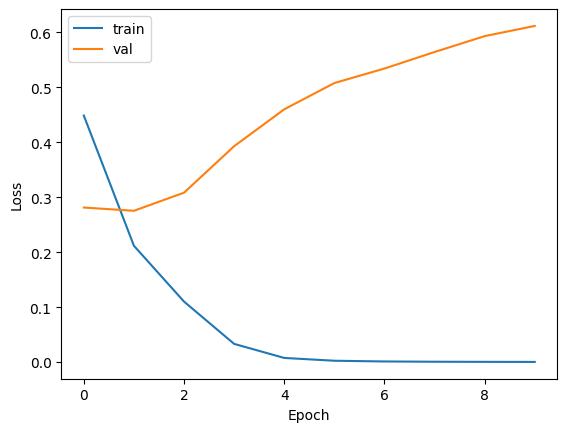

In [32]:
import matplotlib.pyplot as plt
# Train a vanilla neural network
model_1 = Sequential()
model_1.add(Embedding(input_dim=10000, output_dim=32, input_length=500))
model_1.add(Flatten())
model_1.add(Dense(units=16, activation='relu'))
model_1.add(Dense(units=1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, verbose=1)

# Evaluate the vanilla neural network on the test set
y_pred = model_1.predict(X_test)
y_pred = np.round(y_pred).flatten()
acc = accuracy_score(y_test, y_pred)
print(f'Test accuracy of vanilla neural network: {acc:.4f}')
print(classification_report(y_test, y_pred))

# Plot the training and validation accuracy
plt.plot(history_1.history['accuracy'], label='train')
plt.plot(history_1.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



Epoch 1/10
272/272 [==============================] - 50s 182ms/step - loss: 0.4268 - accuracy: 0.7721 - val_loss: 0.2672 - val_accuracy: 0.8934
Epoch 2/10
272/272 [==============================] - 50s 184ms/step - loss: 0.2045 - accuracy: 0.9246 - val_loss: 0.2628 - val_accuracy: 0.8946
Epoch 3/10
272/272 [==============================] - 51s 187ms/step - loss: 0.1267 - accuracy: 0.9548 - val_loss: 0.2797 - val_accuracy: 0.8928
Epoch 4/10
272/272 [==============================] - 51s 186ms/step - loss: 0.0694 - accuracy: 0.9771 - val_loss: 0.4028 - val_accuracy: 0.8844
Epoch 5/10
272/272 [==============================] - 50s 184ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.5169 - val_accuracy: 0.8830
Epoch 6/10
272/272 [==============================] - 50s 184ms/step - loss: 0.0178 - accuracy: 0.9952 - val_loss: 0.6649 - val_accuracy: 0.8836
Epoch 7/10
272/272 [==============================] - 52s 192ms/step - loss: 0.0203 - accuracy: 0.9927 - val_loss: 0.5833 - val_ac

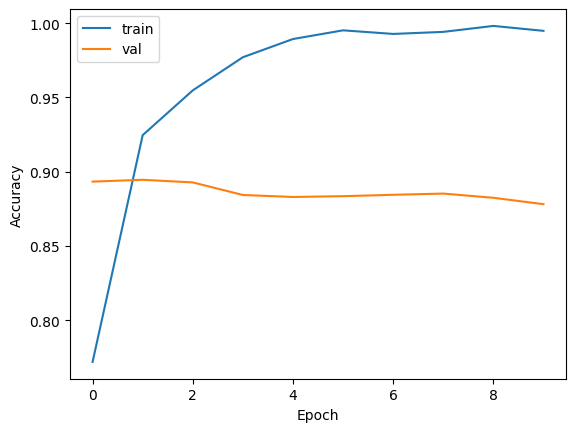

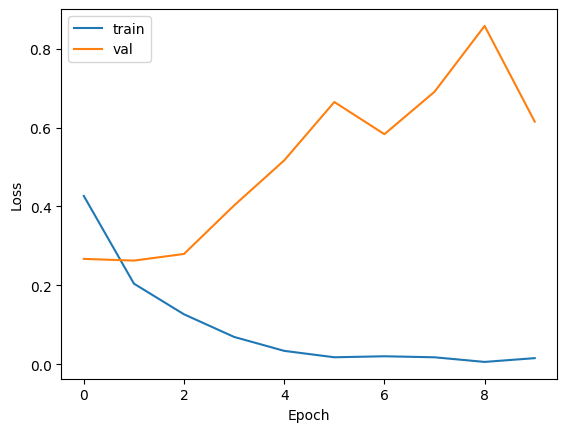

In [33]:
from keras.layers import Embedding, Conv1D, MaxPooling1D
# Train a more complex neural network
model_2 = Sequential()
model_2.add(Embedding(input_dim=10000, output_dim=64, input_length=500))
model_2.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Flatten())
model_2.add(Dense(units=128, activation='relu'))
model_2.add(Dropout(rate=0.5))
model_2.add(Dense(units=1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, verbose=1)

# Evaluate the more complex neural network on the test set
y_pred = model_2.predict(X_test)
y_pred = np.round(y_pred).flatten()
acc = accuracy_score(y_test, y_pred)
print(f'Test accuracy of more complex neural network: {acc:.4f}')
print(classification_report(y_test, y_pred))

# Plot the training and validation accuracy
plt.plot(history_2.history['accuracy'], label='train')
plt.plot(history_2.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history_2.history['loss'], label='train')
plt.plot(history_2.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Overfitting?
Interpretation: When a model's training accuracy keeps increasing but its validation accuracy starts decreasing, it is a sign of overfitting. The model is fitting the training data too well and not generalizing well to new data. It could be too complex relative to the amount of available training data. 